In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import numpy as np
import scipy.cluster.hierarchy as hcluster
from scipy import sparse
from scipy.sparse.csgraph import connected_components

V = 4.421052631578948


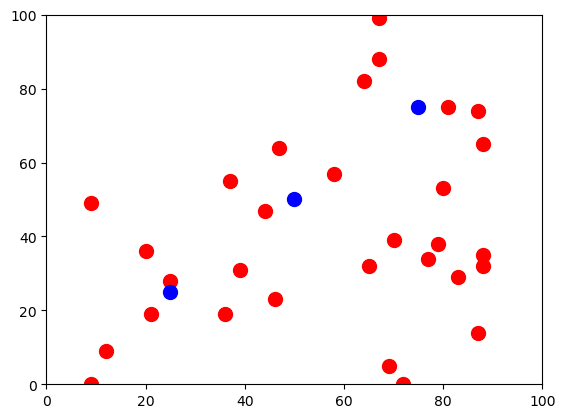

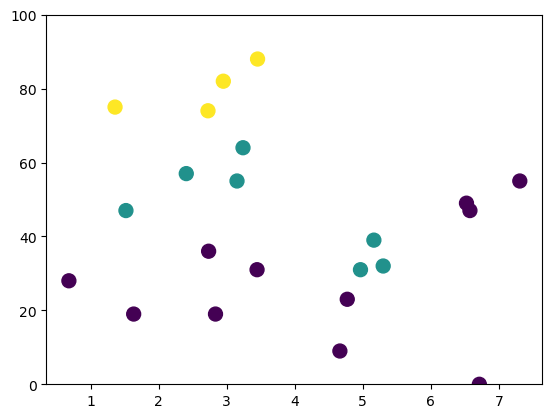

In [2]:
np.random.seed(0)

xlim = [0, 100] # km
ylim = [0, 100] # km

# create 10 random stations based on xlim and ylim
stations = pd.DataFrame({
    "x_km": np.random.randint(0, 100, 30),
    "y_km": np.random.randint(0, 100, 30),
})

# create 2 random events based on xlim and ylim
events = pd.DataFrame({
    # "x_km": np.random.randint(0, 100, 2),
    "x_km": np.linspace(0, 100, 5)[1:-1],
    # "y_km": np.random.randint(0, 100, 3),
    "y_km": np.linspace(0, 100, 5)[1:-1],
})


# create picks from the events to the nearest 3 stations using a travel time of dist / (2.0 / (1.0/VP + 1.0/VS))
VP = 6.0
VS = 3.5
V = 2.0 / (1.0/VP + 1.0/VS)
print(f"{V = }")
picks = []
for i in range(len(events)):
    dist = np.sqrt((stations["x_km"] - events["x_km"][i])**2 + (stations["y_km"] - events["y_km"][i])**2)
    nearest_stations = np.argsort(dist)[:np.random.randint(3, len(stations)//2)]
    for j in nearest_stations:
        picks.append({
            "event_index": i,
            "station_index": j,
            "travel_time": dist[j] / V,
        })

## events and stations
plt.figure()
plt.scatter(stations["x_km"], stations["y_km"], c="red", s=100)
plt.scatter(events["x_km"], events["y_km"], c="blue", s=100)
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

## plot picks
picks = pd.DataFrame(picks)
picks = picks.merge(stations, left_on="station_index", right_index=True)
plt.figure()
plt.scatter(picks["travel_time"], picks["y_km"], c=picks["event_index"], s=100)
plt.ylim(ylim)
plt.show()


    event_index  station_index  travel_time  x_km  y_km
0             0             22     0.678571    25    28
1             0              7     1.631083    21    19
2             0             26     2.733070    20    36
3             0              8     2.834159    36    19
4             0             16     3.445231    39    31
5             0             13     4.663036    12     9
6             0             18     4.771493    46    23
7             0              5     6.524331     9    49
8             0              0     6.575105    44    47
9             0             25     6.713705     9     0
10            0             21     7.308438    37    55
11            1              0     1.517332    44    47
12            1             14     2.404438    58    57
13            1             21     3.150469    37    55
14            1              1     3.238555    47    64
15            1             16     4.965898    39    31
16            1             10     5.162894    7

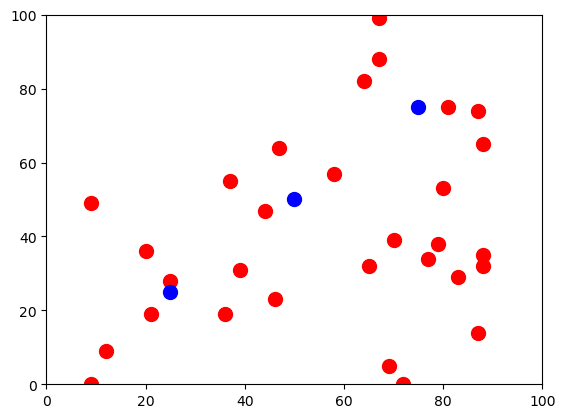

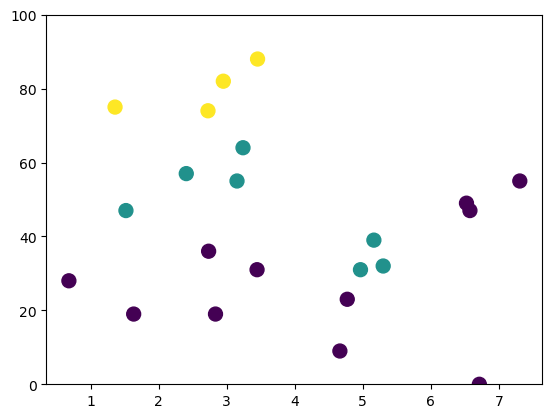

In [3]:
print(picks)

# ## shuffle the picks
# picks = picks.sample(frac=1).reset_index(drop=True)
# print(picks)

## events and stations
plt.figure()
plt.scatter(stations["x_km"], stations["y_km"], c="red", s=100)
plt.scatter(events["x_km"], events["y_km"], c="blue", s=100)
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

## plot picks
plt.figure()
plt.scatter(picks["travel_time"], picks["y_km"], c=picks["event_index"], s=100)
plt.ylim(ylim)
plt.show()

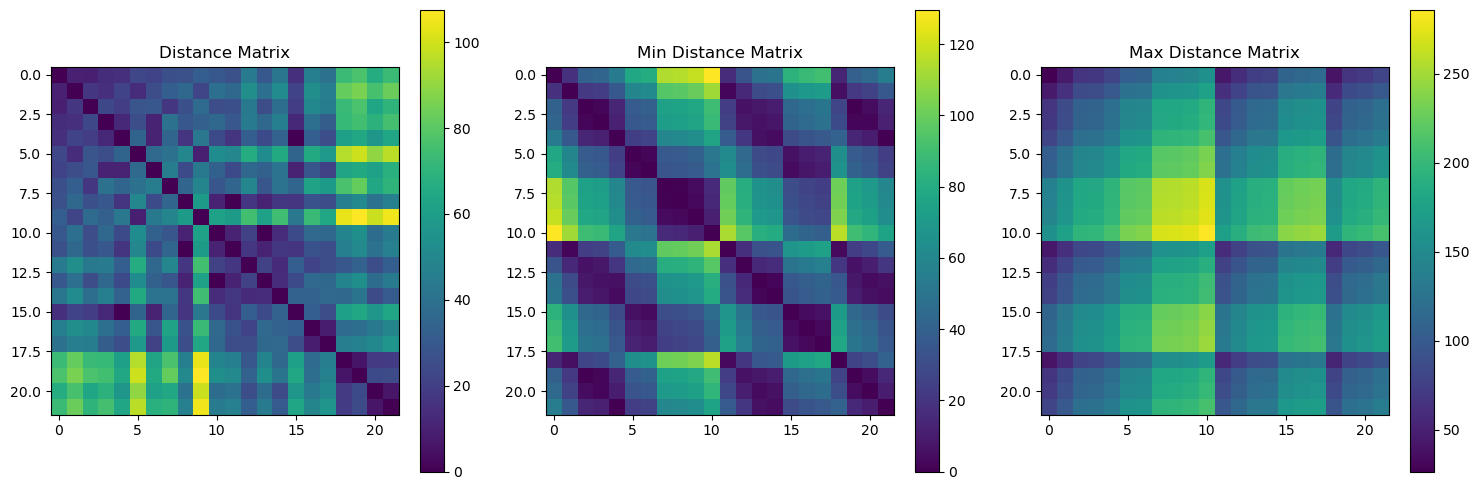

In [4]:
# calcuate station-to-station distance matrix based on picks["station_index"]
dist_matrix = np.zeros((len(picks), len(picks)))
for i in range(len(picks)):
    for j in range(len(picks)):
        dist_matrix[i, j] = np.sqrt((picks["x_km"][i] - picks["x_km"][j])**2 + (picks["y_km"][i] - picks["y_km"][j])**2)

# dist_matrix2 = np.zeros((len(picks), len(picks)))
# for i in range(len(picks)):
#     for j in range(len(picks)): 
#         dist_matrix2[i, j] = np.abs(np.sqrt((picks["x_km"][i] - picks["x_km"][j])**2 + (picks["y_km"][i] - picks["y_km"][j])**2) - np.abs(picks["travel_time"][i] - picks["travel_time"][j]) * V)

min_dist_matrix = np.zeros((len(picks), len(picks)))
for i in range(len(picks)):
    for j in range(len(picks)):
        min_dist_matrix[i, j] = np.abs(picks["travel_time"][i] - picks["travel_time"][j]) * V

max_dist_matrix = np.zeros((len(picks), len(picks)))
for i in range(len(picks)):
    for j in range(len(picks)):
        max_dist_matrix[i, j] = (picks["travel_time"][i] + picks["travel_time"][j]) * V

## plot all distance matrices in one figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot distance matrix
im1 = ax1.imshow(dist_matrix, cmap="viridis")
ax1.set_title("Distance Matrix")
plt.colorbar(im1, ax=ax1)

# Plot min distance matrix
im2 = ax2.imshow(min_dist_matrix * V, cmap="viridis")
ax2.set_title("Min Distance Matrix")
plt.colorbar(im2, ax=ax2)

# Plot max distance matrix
im3 = ax3.imshow(max_dist_matrix * V, cmap="viridis")
ax3.set_title("Max Distance Matrix")
plt.colorbar(im3, ax=ax3)

plt.tight_layout()
plt.show()

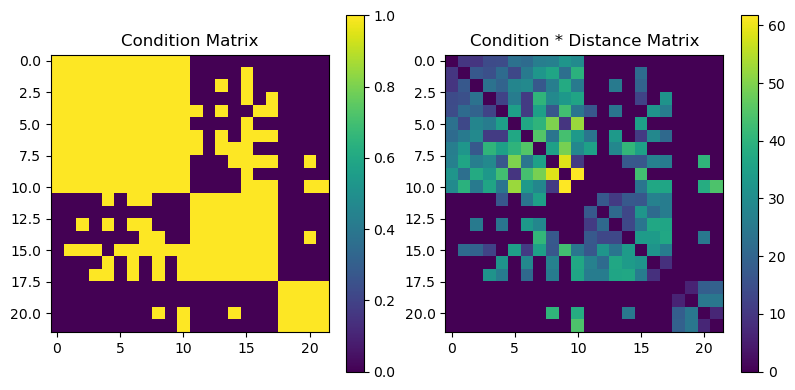

In [5]:
## condition: min_dist_matrix < dist_matrix < max_dist_matrix
condition = (min_dist_matrix <= dist_matrix) & (dist_matrix <= max_dist_matrix)

## plot condition matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot condition matrix
im1 = ax1.imshow(condition, cmap="viridis")
ax1.set_title("Condition Matrix")
plt.colorbar(im1, ax=ax1)

# Plot condition * distance matrix
im2 = ax2.imshow(condition * dist_matrix, cmap="viridis")
ax2.set_title("Condition * Distance Matrix") 
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()


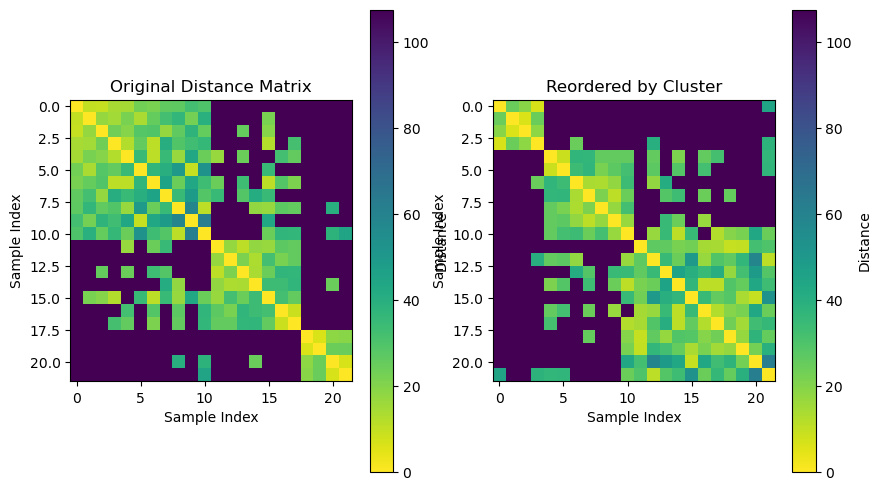

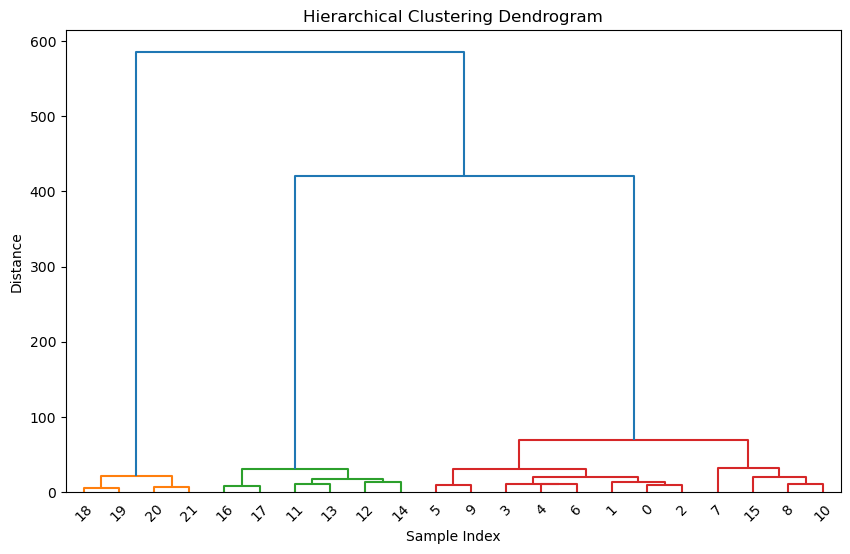

Cluster 1: Samples [18 19 20 21]
Cluster 2: Samples [11 12 13 14 16 17]
Cluster 3: Samples [ 0  1  2  3  4  5  6  7  8  9 10 15]


In [16]:
distance_matrix = condition * dist_matrix

mask = (condition == 0)
np.fill_diagonal(mask, False)  # Don't replace diagonal zeros
distance_matrix[mask] = np.max(distance_matrix) * 10  # Replace with large value

# Convert the distance matrix to a condensed form required by hierarchy
# Get the upper triangular part of the matrix
condensed_dist = squareform(distance_matrix, checks=False)

# Perform hierarchical clustering
Z = hierarchy.linkage(condensed_dist, method='average')

# Cut the dendrogram to get clusters
# clusters = hierarchy.fcluster(Z, 2, criterion='maxclust')
# print("Sample assignments to clusters:", clusters)

t = distance_matrix.max() / 1.5
clusters = hierarchy.fcluster(Z, t=t, criterion='distance')

# threshold = 1.0  # This value needs to be tuned
# incons = hierarchy.inconsistent(Z)
# clusters = hierarchy.fcluster(Z, threshold, criterion='inconsistent', depth=2)
# print("Sample assignments to clusters:", clusters)

# Visualize the clustering
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(distance_matrix, cmap='viridis_r', vmin=0, vmax=np.max(dist_matrix))
plt.colorbar(label='Distance')
plt.title('Original Distance Matrix')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')

# Reorder the distance matrix according to clusters
indices = np.argsort(clusters)
reordered_matrix = distance_matrix[indices, :][:, indices]

plt.subplot(1, 2, 2)
plt.imshow(reordered_matrix, cmap='viridis_r', vmin=0, vmax=np.max(dist_matrix))
plt.colorbar(label='Distance')
plt.title('Reordered by Cluster')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(Z, labels=np.arange(len(distance_matrix)))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Print the clusters
for cluster_id in np.unique(clusters):
    members = np.where(clusters == cluster_id)[0]
    print(f"Cluster {cluster_id}: Samples {members}")